In [1]:
%load_ext autoreload
%autoreload 2

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GomokuTools import GomokuTools, N_9x9
from GomokuBoard import GomokuBoard
from HeuristicScore import HeuristicScore

---
# The Gomoku Board

In [3]:
A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20

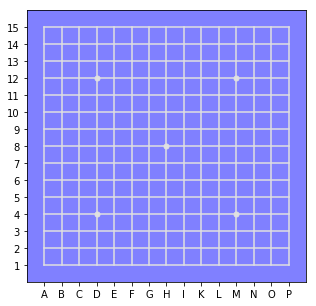

In [4]:
board=GomokuBoard(15, 5)
board.display()

---
### Visualizing threats and opportunities

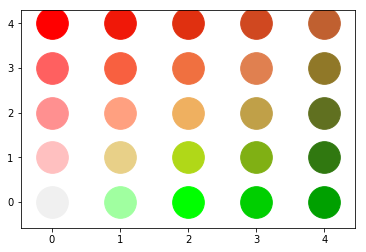

In [5]:
for d in range(4, -1, -1):
    for o in range(5):
        plt.scatter([o], [d], color=board.color_scheme[o][d], s=1000)

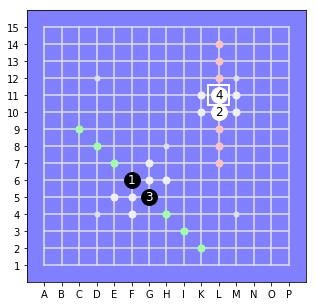

In [6]:
board = GomokuBoard(15, 5, [(F,6), (L,10), (G,5), (L,11)], 
                    HeuristicScore(kappa0=1.5, kappa1 = 5))
board.display(score=True);

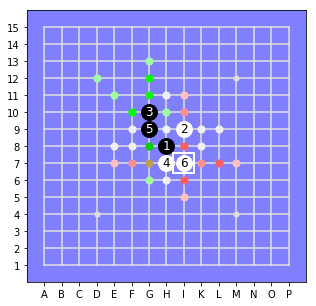

In [7]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.display(score=True);

The board chooses the color automatically.

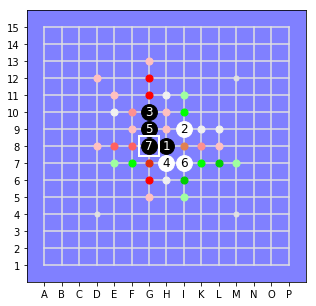

In [8]:
board.set(G,8)
board.display(score=True)

Undo the last move:

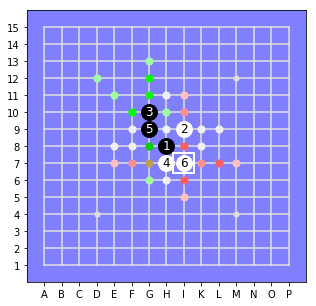

In [9]:
board.undo()
board.display(score=True)

---
Winding the game forward and backward.

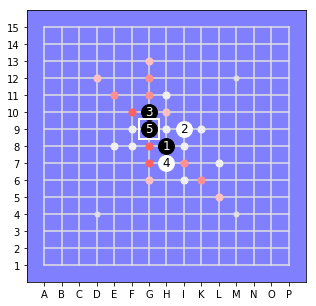

In [10]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9)])
board.display(score=True)

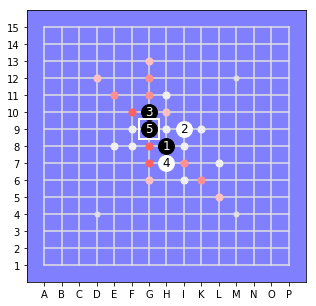

In [11]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.bwd()
board.display(score=True)

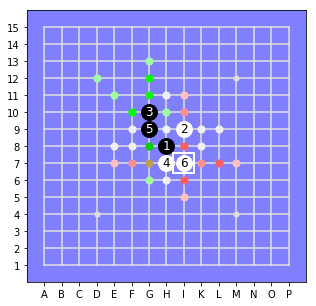

In [12]:
board.fwd()
board.display(score=True)

In [98]:
game = pd.read_csv('3_11_3_2.psq', header=None)
# originally 20x20 data, but fits on a 15x15, if we shift it a bit to the left
game = game - [5,0] 

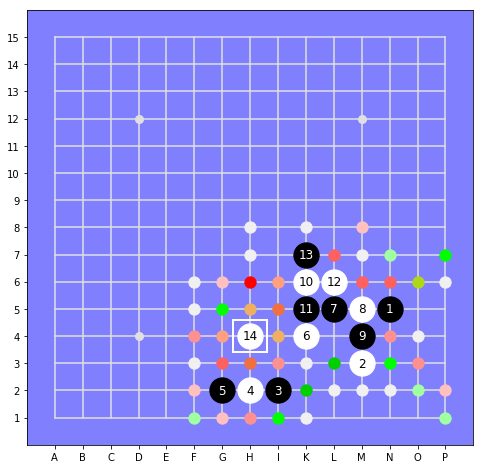

In [110]:
stones = game.values.tolist()
board = GomokuBoard(15, 8, stones)
board.bwd(20).display(score=True)

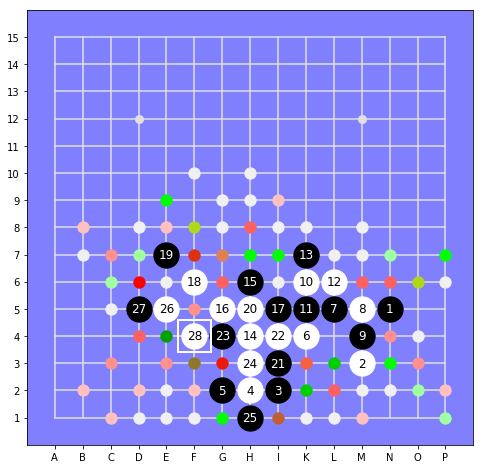

In [127]:
board.fwd(2).display(score=True);

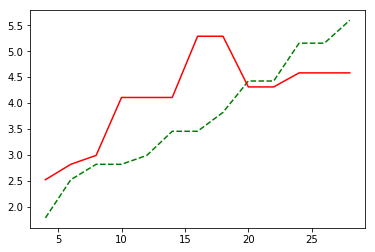

In [128]:
n = (board.cursor+1)
data = pd.DataFrame(board.stats['w'])
plt.plot(range(4, n+2, 2), data['max_o'][2:n//2+1], 'g--', 
         range(4, n+2, 2), data['max_d'][2:n//2+1], 'r' );

In [109]:
pd.DataFrame(board.stats['w'])

,avg_d,avg_o,gsum_d,gsum_o,max_d,max_o
0,31.458342,0.000000,0,0,1.259921,0.000000
1,18.351769,9.819447,0,0,1.781797,1.259921
2,14.106223,9.507318,0,0,2.519842,1.781797
3,13.721293,9.749062,0,0,2.817269,2.519842
4,11.803075,8.839513,0,0,2.989482,2.817269
5,10.463661,8.606478,0,0,4.107799,2.817269
6,9.895454,8.270020,0,0,4.107799,2.989482
7,9.809445,8.118528,0,0,4.107799,3.454997
8,8.913391,7.945393,0,0,5.290162,3.454997
9,9.221539,7.932913,0,0,5.290162,3.819346
